# Homework 3 - Question 1

## Part a)

Compute the PCA and LDA 1D projections for the following 2D dataset:

Samples for class 1 (𝜔1): 𝐗𝟏 = (𝑥1, 𝑥2) = {(4,2), (2,4), (2,3), (3,6), (4,4)}

Samples for class 2 (𝜔2): 𝐗𝟐 = (𝑥1, 𝑥2) = {(6,8), (9,5), (8,7), (10,8)}

Draw the two principal components on the plot for PCA as vectors, as well as the projected blue and red points in 1D.

Draw the projected 1D data using LDA.


In [44]:
"""
required libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
"""

'\nrequired libraries\n\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\nfrom sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA\n'

Step 1: Define Data Points

Step 2: PCA - Principal Component Analysis

1.   Centering the dataset (subtracting the mean from all data points)
2.   Computing the covariance of the dataset
3.   Calculate the eigenvalues and eigenvectors of the covariance matrix.
4.   Finding the principal component with the highest eigenvalue.

Step 3: LDA - Linear Discriminant Analysis

1.   Compute the means of each class.
2.   Calculate the between-class and within-class scatter matrices.
3.   Compute the eigenvalues and eigenvectors for the matrix derived from the scatter matrices.
4.   Project the data onto the vector corresponding to the largest eigenvalue.

Step 4: Plotting

In [45]:
import numpy as np

# Step 1: Define data points

X1_a = np.array([[4, 2], [2, 4], [2, 3], [3, 6], [4, 4]])
X2_a = np.array([[6, 8], [9, 5], [8, 7], [10, 8]])

# Combine the datasets
X_a = np.concatenate((X1_a, X2_a))
# Same with X_a = np.vstack((X1_a, X2_a))
# Both returns ndarray

# Label the dataset
y_a = np.array([0] * 5 + [1] * 4)
# Class labels: 0 for Class 1, 1 for Class 2

print(X_a)
print(y_a)

[[ 4  2]
 [ 2  4]
 [ 2  3]
 [ 3  6]
 [ 4  4]
 [ 6  8]
 [ 9  5]
 [ 8  7]
 [10  8]]
[0 0 0 0 0 1 1 1 1]


In [46]:
from sklearn.decomposition import PCA

# Step 2: PCA

pca_a = PCA(n_components=2)

# Find the principal components
pca_a.fit(X_a)

# Rotate X into the new coordinate system:
X_pca_a = pca_a.transform(X_a)

print(type(pca_a))
print("\n", X_pca_a)

<class 'sklearn.decomposition._pca.PCA'>

 [[-2.80323768  2.07421126]
 [-3.48646324 -0.67045681]
 [-4.00182387  0.1865166 ]
 [-1.59876858 -1.869043  ]
 [-1.77251642  0.36026444]
 [ 2.0028729  -2.03690794]
 [ 3.02771125  2.08009417]
 [ 3.20145909 -0.14921328]
 [ 5.43076654  0.02453457]]


In [47]:
"""
# coeficients of the original components to produce the new components:
pca.components_
# variance of projections per component:
pca.explained_variance_
# ratio of explained variance per component:
pca.explained_variance_ratio_
"""

'\n# coeficients of the original components to produce the new components:\npca.components_\n# variance of projections per component:\npca.explained_variance_\n# ratio of explained variance per component:\npca.explained_variance_ratio_\n'

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Step 3: LDA

lda_a = LDA(n_components=1)

# Transform data using LDA
X_lda_a = lda_a.fit_transform(X_a, y_a)

In [49]:
"""
# Train a logistic regression classifier using transformed training data
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
# transform the test data with the same LDA parameters and classify test set
X_test_lda = lda.transform(X_test)
lr.score(X_test_lda, y_test)
"""

"\n# Train a logistic regression classifier using transformed training data\nlr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')\nlr = lr.fit(X_train_lda, y_train)\n# transform the test data with the same LDA parameters and classify test set\nX_test_lda = lda.transform(X_test)\nlr.score(X_test_lda, y_test)\n"

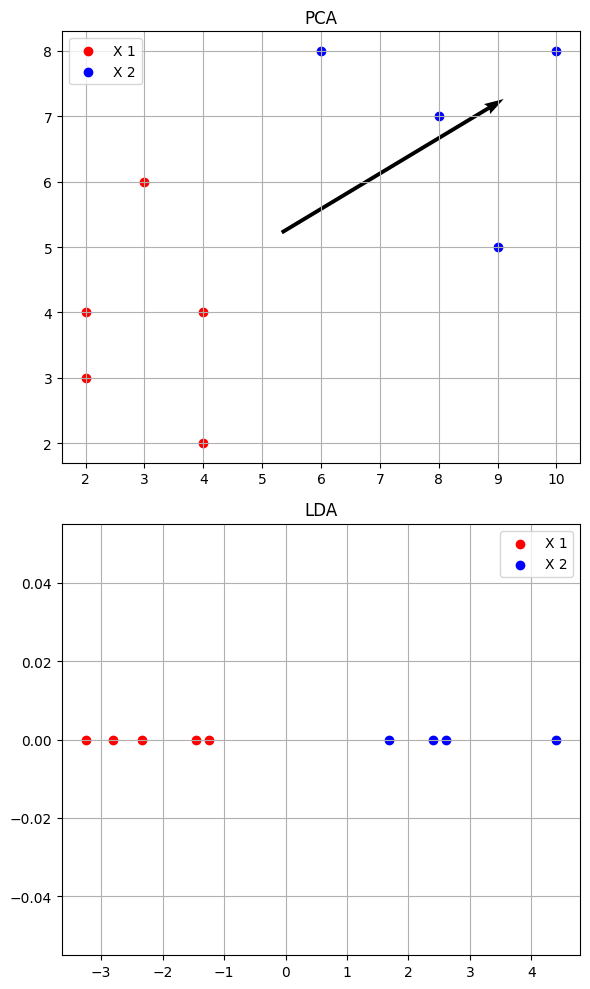

In [50]:
import matplotlib.pyplot as plt

# Step 4: Plotting

# Initializing the figure
fig = plt.figure(figsize=(6, 10))

# Creating subplots
ax = fig.subplots(2)


ax[0].set_title("PCA")

ax[0].scatter(X1_a[:,0], X1_a[:,1], color='red', label='X 1')
ax[0].scatter(X2_a[:,0], X2_a[:,1], color='blue', label='X 2')

ax[0].quiver(*np.mean(X_a, axis=0), *pca_a.components_[0], scale=2, color="black")

ax[0].legend()
ax[0].grid(True)


ax[1].set_title("LDA")

ax[1].scatter(X_lda_a[y_a==0], np.zeros_like(X_lda_a[y_a==0]), color="red", label="X 1")
ax[1].scatter(X_lda_a[y_a==1], np.zeros_like(X_lda_a[y_a==1]), color="blue", label="X 2")

ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

## Part b

Repeat (a) for the following dataset:

Samples for class 1 (𝜔1): 𝐗𝟏 = (𝑥1, 𝑥2) = {(6,8), (2,4), (2,3), (3,6)}

Samples for class 2 (𝜔2):𝐗𝟐 = (𝑥1, 𝑥2) = {(9,5), (8,7), (10,8), (4,2), (4,4)}

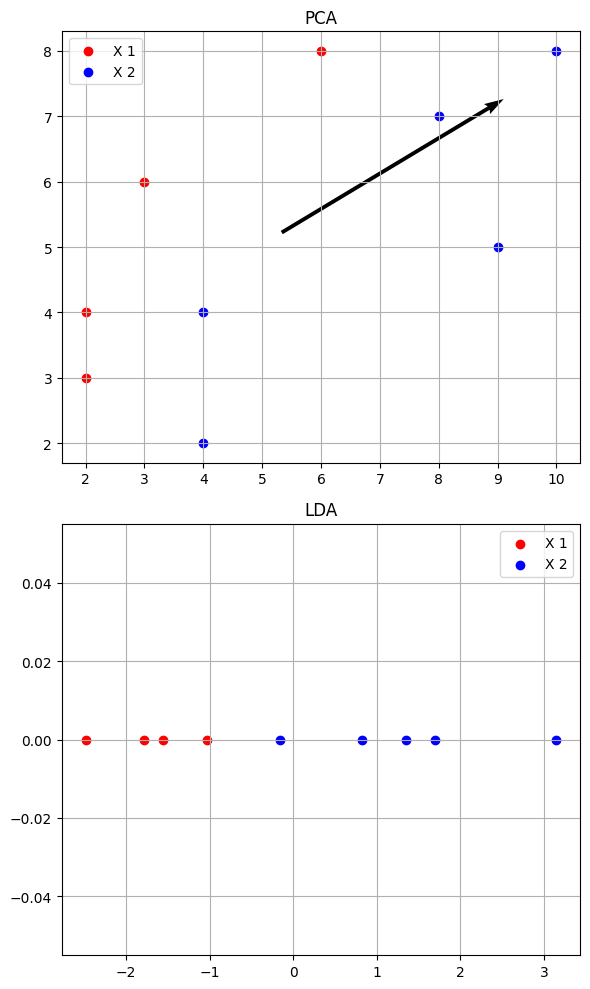

In [52]:
# Step 1: Define the dataset for part

X1_b = np.array([[6,8], [2,4], [2,3], [3,6]])
X2_b = np.array([[9,5], [8,7], [10,8], [4,2], [4,4]])
# Combine the datasets
X_b = np.vstack((X1_b, X2_b))
y_b = np.array([0] * 4 + [1] * 5)  # Class labels: 0 for Class 1, 1 for Class 2


# Step 2: PCA

pca_b = PCA(n_components=2)
X_pca_b = pca_b.fit_transform(X_b)


# Step 3: LDA

lda_b = LDA(n_components=1)
X_lda_b = lda_b.fit_transform(X_b, y_b)


# Step 4: Plotting

fig, ax = plt.subplots(2, figsize=(6, 10))

# PCA plotting
ax[0].set_title("PCA")

ax[0].scatter(X1_b[:,0], X1_b[:,1], color="red", label="X 1")
ax[0].scatter(X2_b[:,0], X2_b[:,1], color="blue", label="X 2")

ax[0].quiver(*np.mean(X_b, axis=0), *pca_b.components_[0], scale=2, color="black")

ax[0].legend()
ax[0].grid(True)

# LDA projection plotting
ax[1].set_title("LDA")

ax[1].scatter(X_lda_b[y_b==0], np.zeros_like(X_lda_b[y_b==0]), color='red', label='X 1')
ax[1].scatter(X_lda_b[y_b==1], np.zeros_like(X_lda_b[y_b==1]), color='blue', label='X 2')

ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

## Part c

Comment and compare how good the 1D projected data in (a) and (b) can be classified after PCA and
LDA.


In this question, two point datasets were examined and dimensional reduction methods was applied to both of them (principle component analysis and linear discriminant analysis). The steps to be followed are written at the beginning.

**The Comparison**

Dataset "a" shows more distinct clusters for each class in both the PCA and LDA projections. This can be seen in the PCA and LDA graph figures.
This shows that dataset "a" may be easier to classify using the reduced 1D data.